# Recurrent Neural Networks on Images

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

tf.get_logger().setLevel(logging.ERROR)

## Import MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.

In [3]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_test : {y_test.shape}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test : (10000, 28, 28)
Y_test : (10000,)


## RNN Model

In [4]:
timesteps, input_dim = X_train.shape[1:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((timesteps, input_dim)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='softmax')
], name = 'RNN')

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,282 (8.91 KB)

 Trainable params: 2,282 (8.91 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
BATCH_SIZE = 128
EPOCHS = 10

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4767 - loss: 1.5588
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7899 - loss: 0.6577
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8346 - loss: 0.5279
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8615 - loss: 0.4471
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8810 - loss: 0.3914
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8976 - loss: 0.3465
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9048 - loss: 0.3201
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9099 - loss: 0.3016
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9160 - loss: 0.2831
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9209 - loss: 0.2676


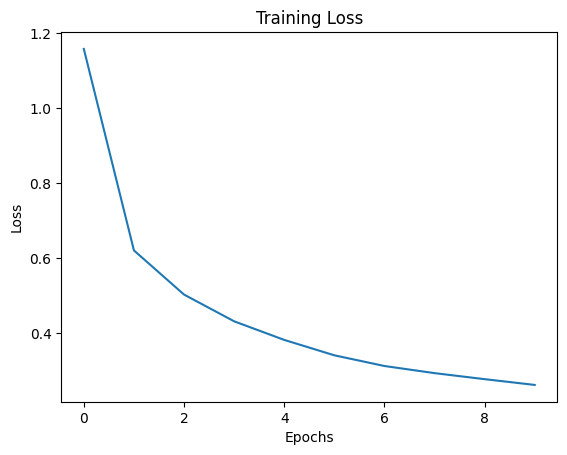

In [6]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Performance on test set:')
print(f'Loss: {test_loss}\nAccuracy: {test_accuracy}')

Performance on test set:
Loss: 0.2654323875904083
Accuracy: 0.9241999983787537
